In [106]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import StratifiedShuffleSplit
MAX_SENTENCE_LENGTH = 200
import nltk
import numpy as np
import torch
from torch.utils.data import Dataset

In [107]:
stop_words = ["i","i","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself","yourselves","he","him","his","himself","she","her","hers","herself","it","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about","against","between","into","through","during","before","after","to","from","up","down","in","on","off","again","further","then","once","here","there","when","where","why","how","all","any","both","each","few","more","other","some","such","only","own","same","so","than","too","very","s","t","can","will","just","don","should","now"]

In [108]:
import spacy
tokenize = spacy.load('en_core_web_sm')

In [109]:
import torch
print(torch.__version__)

0.4.1


In [110]:
path_train_pos = "/home/cvh255/nlp_hw1/aclImdb/train/pos/"
path_train_neg = "/home/cvh255/nlp_hw1/aclImdb/train/neg/"

In [111]:
train_pos_files = os.listdir(path_train_pos)
for f in range(len(train_pos_files)):
    train_pos_files[f] = path_train_pos + train_pos_files[f]

In [112]:
train_neg_files = os.listdir(path_train_neg)
for f in range(len(train_neg_files)):
    train_neg_files[f] = path_train_neg + train_neg_files[f]

In [113]:
train_pos_labels = [1]*len(train_pos_files)
train_neg_labels = [0]*len(train_neg_files)

In [114]:
df = pd.DataFrame(columns=["file_names","labels"])
df["file_names"] = train_pos_files+train_neg_files
df["labels"] = train_pos_labels+train_neg_labels

In [115]:
df.shape

(25000, 2)

In [116]:
df.head()

,file_names,labels
0,/home/cvh255/nlp_hw1/aclImdb/train/pos/9258_10...,1
1,/home/cvh255/nlp_hw1/aclImdb/train/pos/3_10.txt,1
2,/home/cvh255/nlp_hw1/aclImdb/train/pos/9597_10...,1
3,/home/cvh255/nlp_hw1/aclImdb/train/pos/3347_7.txt,1
4,/home/cvh255/nlp_hw1/aclImdb/train/pos/2160_8.txt,1


In [117]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(df["file_names"], df["labels"]):
    train_df = df.iloc[train_index]
    val_df = df.iloc[test_index]

In [118]:
train_df.shape,val_df.shape

((20000, 2), (5000, 2))

In [119]:
def get_data(df):
    all_txt = []
    for i,j in df.iterrows():
        f = open(j["file_names"])
        txt = f.read()
        all_txt.append(txt)
#         print(j)
    df["content"] = all_txt
    return df

In [120]:
train_df = get_data(train_df)
val_df = get_data(val_df)

/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [121]:
import string
punctuations = string.punctuation
def tokenize1(phrase):
    tokens = tokenize(phrase)
    return [token.text.lower() for token in tokens if (token.text not in punctuations and token.text not in stop_words)]
    

In [122]:
tokenize1("I am going mad! you are nuts")

['i', 'going', 'mad', 'nuts']

In [123]:
def tokenize_dataset1(dataset,n_gram):
    token_dataset = []
    all_tokens = []
    for sample in dataset:
        tokens = tokenize1(sample)
        token_dataset.append(tokens)
        all_tokens+=tokens
    return token_dataset, all_tokens

In [124]:
print ("Tokenizing val data")
val_df["tokenized1"], _ = tokenize_dataset1(val_df["content"],1)
# pkl.dump(val_data_tokens, open("val_data_tokens.p", "wb"))

# train set tokens
print ("Tokenizing train data")
train_df["tokenized1"], all_train_tokens = tokenize_dataset1(train_df["content"],1)
# pkl.dump(train_data_tokens, open("train_data_tokens.p", "wb"))
# pkl.dump(all_train_tokens, open("all_train_tokens.p", "wb"))

Tokenizing val data


/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Tokenizing train data


/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [125]:
train_df.head()

,file_names,labels,content,tokenized1
8283,/home/cvh255/nlp_hw1/aclImdb/train/pos/4793_7.txt,1,After seeing this film I feel like I know just...,"[after, seeing, film, i, feel, like, i, know, ..."
10937,/home/cvh255/nlp_hw1/aclImdb/train/pos/11592_1...,1,"My son was 7 years old when he saw this movie,...","[my, son, 7, years, old, saw, movie, russian, ..."
9347,/home/cvh255/nlp_hw1/aclImdb/train/pos/3243_8.txt,1,"Remember the early days of Pay Per View? I do,...","[remember, early, days, pay, per, view, i, alm..."
5430,/home/cvh255/nlp_hw1/aclImdb/train/pos/10129_7...,1,And that's how the greatest comedy of TV start...,"[and, 's, greatest, comedy, tv, started, it, 1..."
4072,/home/cvh255/nlp_hw1/aclImdb/train/pos/9873_7.txt,1,"Lily Mars, a smalltown girl living in Indiana,...","[lily, mars, smalltown, girl, living, indiana,..."


In [126]:
train_df.to_csv("train_df_tok2.csv",index=False)

In [127]:
val_df.to_csv("val_df_tok2.csv",index=False)

In [128]:
import pickle
pickle.dump(all_train_tokens,open("all_tokens2",'wb'))

In [5]:
train_df = pd.read_csv("train_df_tok1.csv")
val_df = pd.read_csv("val_df_tok1.csv")

In [6]:
import pickle
all_train_tokens = pickle.load(open("all_tokens1",'rb'))

In [129]:
from collections import Counter

max_vocab_size = 50000
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens):
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens)

In [130]:
import random
random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))

Token id 2653 ; token during
Token during; token id 2653


In [131]:
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_df['token_idized'] = token2index_dataset(train_df['tokenized1'])
val_df['token_idized'] = token2index_dataset(val_df['tokenized1'])
# test_data_indices = token2index_dataset(test_data_tokens)



/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [132]:
train_df.head()

,file_names,labels,content,tokenized1,token_idized
8283,/home/cvh255/nlp_hw1/aclImdb/train/pos/4793_7.txt,1,After seeing this film I feel like I know just...,"[after, seeing, film, i, feel, like, i, know, ...","[372, 239, 6, 2, 155, 11, 2, 58, 50, 146, 2999..."
10937,/home/cvh255/nlp_hw1/aclImdb/train/pos/11592_1...,1,"My son was 7 years old when he saw this movie,...","[my, son, 7, years, old, saw, movie, russian, ...","[286, 381, 1134, 83, 80, 133, 5, 1646, 5160, 1..."
9347,/home/cvh255/nlp_hw1/aclImdb/train/pos/3243_8.txt,1,"Remember the early days of Pay Per View? I do,...","[remember, early, days, pay, per, view, i, alm...","[303, 316, 425, 885, 3163, 587, 2, 140, 303, 5..."
5430,/home/cvh255/nlp_hw1/aclImdb/train/pos/10129_7...,1,And that's how the greatest comedy of TV start...,"[and, 's, greatest, comedy, tv, started, it, 1...","[55, 3, 742, 136, 164, 562, 12, 2029, 83, 161,..."
4072,/home/cvh255/nlp_hw1/aclImdb/train/pos/9873_7.txt,1,"Lily Mars, a smalltown girl living in Indiana,...","[lily, mars, smalltown, girl, living, indiana,...","[3322, 4508, 37931, 159, 512, 6567, 1259, 151,..."


In [133]:
# train_df.iloc[2,-1]

In [134]:
class IMDBDataset(Dataset):
    def __init__(self, csv_file):
        self.data_frame = csv_file

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
#         print(idx,self.data_frame["token_idized"][idx])
        token_idx = self.data_frame.iloc[idx]["token_idized"]
        label = self.data_frame.iloc[idx]['labels']
#         print(token_idx)
        return [token_idx, len(token_idx), label]




In [135]:
def pad_fun(batch):
    data_list = []
    label_list = []
    length_list = []
#     print(batch[0])
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    for datum in batch:
        if datum[1]>MAX_SENTENCE_LENGTH:
            padded_vec = np.array(datum[0][:MAX_SENTENCE_LENGTH])
        else:
            padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH - datum[1])), 
                                mode="constant", constant_values=0)
#         print(padded_vec.shape)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.from_numpy(np.array(length_list)), torch.from_numpy(np.array(label_list))]

In [136]:
BATCH_SIZE = 100
train_dataset = IMDBDataset(train_df)
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, 
                                           batch_size = BATCH_SIZE,
                                           collate_fn = pad_fun,
                                           shuffle = True)

val_dataset = IMDBDataset(val_df)
val_loader = torch.utils.data.DataLoader(dataset = val_dataset, 
                                           batch_size = BATCH_SIZE,
                                           collate_fn = pad_fun,
                                           shuffle = True)



In [137]:
# next(iter(train_loader))

In [138]:
# d = next(iter(train_loader))


In [139]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
class BagOfWords(nn.Module):
    def __init__(self, vocab_size, emb_dim):
        super(BagOfWords, self).__init__()
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx = 0)
#         self.linear = nn.Linear(emb_dim,20)
        self.linear = nn.Linear(emb_dim,2)
#         self.linear2 = nn.Linear(100,300)
#         self.linear3 = nn.Linear(300,2)
#         self.dp = nn.Dropout(p=0.5)
    
    def forward(self, data, length):
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
#         out = F.relu(self.linear(out.float()))
#         out = F.relu(self.linear2(out.float()))
#         out = self.linear3(out.float())
#         print(out.size())
        out = self.linear(out.float())
        return out



In [140]:
# next(iter(train_loader))

In [141]:
dataloaders = [train_loader,val_loader]

In [142]:
def training(model,criterion, optimizer, name, num_epochs):
    best_loss = np.inf
    best_acc = 0
    loss_hist = {'train':[],'validate':[]}
    for i in range(num_epochs):
        for enu,phase in enumerate(['train', 'validate']):
            running_loss = 0
            running_total = 0
            correct = 0
            total = 0
            if phase == 'train':
                model.train(True)
            else:
                model.train(False)
            for (data, lengths, labels) in dataloaders[enu]:
                data_batch, length_batch, label_batch = data.cuda(), lengths.cuda(), labels.cuda()
                optimizer.zero_grad()
                outputs = model(data_batch, length_batch)
                loss = criterion(outputs, label_batch)
                if phase=='train':
                    loss.backward()
                    optimizer.step()
                N = labels.size(0)
                
                outputs = F.softmax(model(data_batch, length_batch), dim=1)
                predicted = outputs.max(1, keepdim=True)[1]
#                 print(type(predicted))
                total += labels.size(0)
                correct += predicted.eq(labels.view_as(predicted).cuda()).sum().item()
                running_loss += loss.data[0] * N
                running_total += N
            epoch_loss = running_loss/running_total
            loss_hist[phase].append(epoch_loss.item())
            accuracy = 100 * correct / total
            print('Epoch: {}, Phase: {}, epoch loss: {:.4f}, accuracy: {:.4f}'\
                      .format(i,phase,epoch_loss, accuracy))
        if phase == 'validate' and epoch_loss < best_loss:
            best_loss = epoch_loss
            best_acc = accuracy
            torch.save(model,name)
    print('Best val dice loss: {:4f}, Best Accuracy: {:4f}'.format(best_loss,best_acc))
    return model, loss_hist

In [143]:
emb_dim = 200
model = BagOfWords(len(id2token), emb_dim).cuda()
# model = nn.DataParallel(model)
learning_rate = 0.01
# num_epochs = 100

criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
# optimizer = torch.optim.SGD(model)


m_save, loss_hists = training(model,criterion,optimizer,"model11_tokenize2",10)

/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 0, Phase: train, epoch loss: 0.3642, accuracy: 86.7350
Epoch: 0, Phase: validate, epoch loss: 0.2915, accuracy: 88.7000


/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type BagOfWords. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch: 1, Phase: train, epoch loss: 0.1334, accuracy: 96.5850
Epoch: 1, Phase: validate, epoch loss: 0.3367, accuracy: 87.9000
Epoch: 2, Phase: train, epoch loss: 0.0469, accuracy: 99.2600
Epoch: 2, Phase: validate, epoch loss: 0.4469, accuracy: 86.8800
Epoch: 3, Phase: train, epoch loss: 0.0150, accuracy: 99.9000
Epoch: 3, Phase: validate, epoch loss: 0.5166, accuracy: 87.3600
Epoch: 4, Phase: train, epoch loss: 0.0046, accuracy: 99.9900
Epoch: 4, Phase: validate, epoch loss: 0.5715, accuracy: 87.0800
Epoch: 5, Phase: train, epoch loss: 0.0022, accuracy: 99.9950
Epoch: 5, Phase: validate, epoch loss: 0.5977, accuracy: 87.4000
Epoch: 6, Phase: train, epoch loss: 0.0012, accuracy: 100.0000
Epoch: 6, Phase: validate, epoch loss: 0.6241, accuracy: 87.3400
Epoch: 7, Phase: train, epoch loss: 0.0009, accuracy: 100.0000
Epoch: 7, Phase: validate, epoch loss: 0.6462, accuracy: 87.3200
Epoch: 8, Phase: train, epoch loss: 0.0006, accuracy: 100.0000
Epoch: 8, Phase: validate, epoch loss: 0.6663,

In [144]:
import matplotlib.pyplot as plt
train_acc = [86.735,96.58,99.26,99.9,99.99,99.995,100,100,100,100]
val_acc = [88.7,87.9,86.88,87.08,87.4,87.32,87.32,]
plt.plot(train_acc,label="train acc")
plt.plot(val_acc,label="val_acc")
plt.legend()
plt.show()

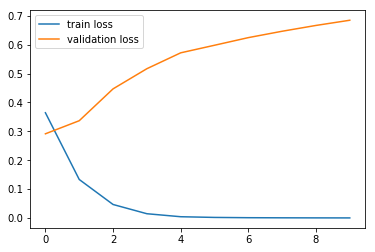

In [145]:
plt.plot(loss_hists['train'],label="train loss")
plt.plot(loss_hists['validate'],label="validation loss")
plt.legend()
plt.show()

In [146]:
import pickle
pickle.dump(loss_hists,open("loss_hist11_t2",'wb'))